  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non

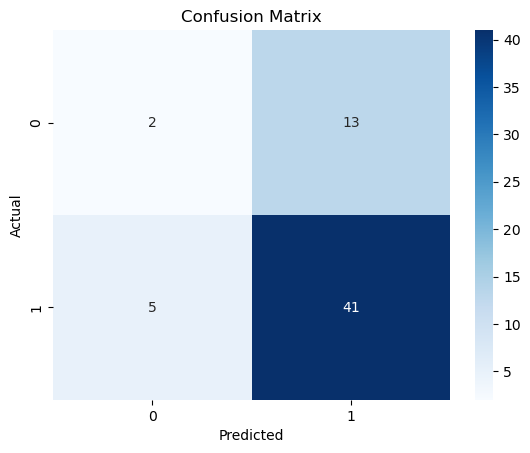

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Step 2: Load dataset
df = pd.read_csv('cardata.csv')  # Adjust path as needed

# Step 3: Explore dataset
print(df.head())
print(df.info())

# Step 4: Check column names to ensure 'Fuel_Type' is present
print("Columns in dataset:", df.columns)

# Replace 'Fuel_Type' with your actual target column
target_column = 'Fuel_Type'  # Ensure this matches your actual target column name

# Step 5: Prepare features and labels
X = df.drop(target_column, axis=1)  # Features (dropping the target column)
y = df[target_column]              # Target variable

# Step 6: Encode categorical features
# Using LabelEncoder for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Using OneHotEncoder for categorical features
# We will encode 'Car_Name', 'Seller_Type', 'Transmission', and 'Fuel_Type'
categorical_features = ['Car_Name', 'Seller_Type', 'Transmission']
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Step 7: Handle missing values (if any)
# Use SimpleImputer to fill missing values with the mean for numeric columns
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Step 8: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Create and train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Step 10: Make predictions
y_pred = model.predict(X_test)

# Step 11: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
